In [49]:
## importing libraries
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns
from sklearn import linear_model


from scipy import stats
import pylab

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [50]:
def excel_reader(file_name, tab_name):
    '''
    Function reads in the excel file into a pandas dataframe.
    It requires two arguments:
    - Name of the excel file
    - Name of the specific tab
    
    It also sets the index to the first column in the dataframe which is expected to be the date.
    '''
    file = pd.ExcelFile(file_name)
    df = pd.read_excel(file, tab_name)
    df = df.set_index(df.columns[0])
    
    return df

In [51]:
# Reading the data
data = excel_reader('Jacobi Python Exercise B - Time series analysis.xlsx', 'Raw Data')
data = data.iloc[:, :len(data.columns)-1]
data.head(5)

,RF-Equity Risk Prem US,RF-Commodity USD,RF-Bond Risk Premium US,RF-Inflation BEI US,RF-HY Credit Prem US,Real Estate Portfolio,Balanced Portfolio
Date,,,,,,,
2001-01-31,0.030072,-0.007621,-0.004521,-0.009590,0.053886,0.006028,0.030398
2001-02-28,-0.108427,-0.046314,0.020991,-0.027348,0.005430,0.005412,-0.052899
2001-03-31,-0.075763,-0.031978,0.000303,0.011790,-0.027338,0.005959,-0.036484
2001-04-30,0.077355,0.006122,-0.030078,0.017241,-0.006038,0.004846,0.046145
2001-05-31,-0.000131,0.009871,-0.003840,-0.018456,0.011418,0.004984,0.009145


In [52]:
def volatility(dataframe):
    '''
    This function takes in a dataframe in "% monthly returns" and returns annualized volatility and monthly returns.
    '''
    monthly_returns = dataframe/100
    monthly_std = monthly_returns.std()
    annualized_vol = monthly_std * np.sqrt(12)
    
    return annualized_vol, monthly_returns

risk, monthly_returns = volatility(data)

In [53]:
def histogram_of_returns(dataframe):
    '''
    Creates n number of histograms arranged in subplots based on the number of columns in a dataframe.
    '''
    colors = ['b','g','r','c','m','y','k']
    n = dataframe.shape[1]
    
    plt.figure(figsize=(3*n,3*n))
    
    if n > len(colors):
        for i in range(1,n+1):
            plt.subplot(math.ceil(n/2), 2, i)
            plt.hist(dataframe.iloc[:, i-1], bins=100, color=random.choice(colors))
            plt.title(dataframe.columns[i-1])
            plt.xlabel('Monthly Return')
            plt.ylabel('Count')
    else:
        for i in range(1,n+1):
            plt.subplot(math.ceil(n/2), 2, i)
            plt.hist(dataframe.iloc[:, i-1], bins=100, color=colors[i-1])
            plt.title(dataframe.columns[i-1])
            plt.xlabel('Monthly Return')
            plt.ylabel('Count')
    
    
    plt.show()
    

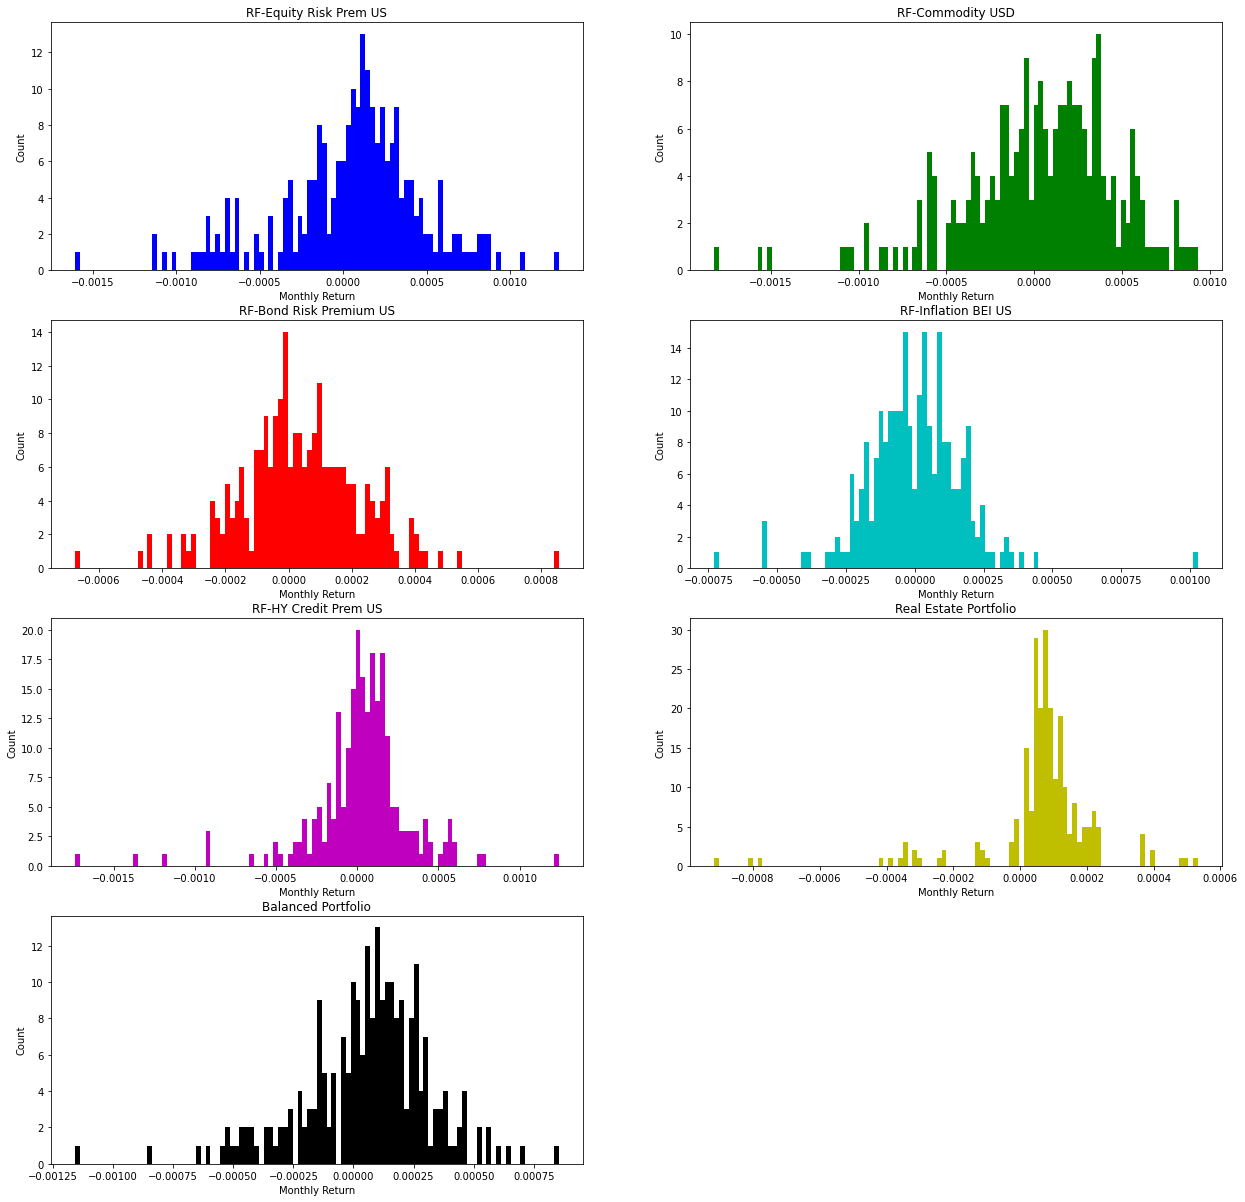

In [54]:
histogram_of_returns(monthly_returns)

### Annualised volatility

In [55]:
risk

RF-Equity Risk Prem US     0.001485
RF-Commodity USD           0.001524
RF-Bond Risk Premium US    0.000666
RF-Inflation BEI US        0.000612
RF-HY Credit Prem US       0.001068
Real Estate Portfolio      0.000576
Balanced Portfolio         0.000917
dtype: float64

In [8]:
def correlation(dataframe):
    '''
    Calulates the correlation matrix for a provided dataframe of returns.
    '''
    return dataframe.corr()

In [9]:
def heat_map(dataframe):
    '''
    Creates a heatmap to visualise the correlation matrix.
    
    Input dataframe - Correlation matrix previously calculated
    '''
    f, ax = plt.subplots(figsize=(9,5))
    ax = sns.heatmap(dataframe, vmin=-1, vmax=1, cmap="YlGnBu", annot=True, linewidths=0.5)
    
    plt.show()
    

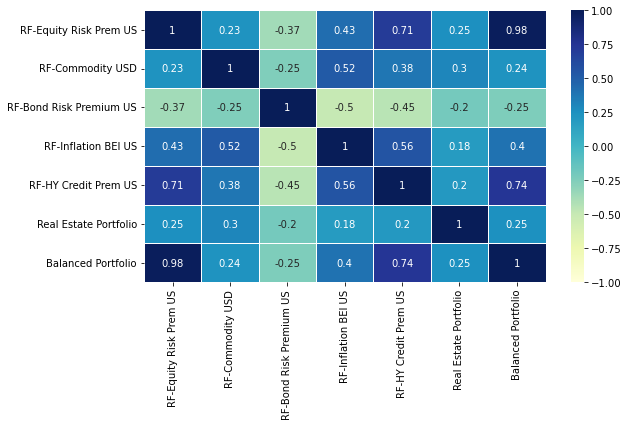

In [36]:
overall_correlation = correlation(data)
heat_map(overall_correlation)

# Model 1 - Balanced Portfolio

## Assumptions of the Model

1. Regression residuals must be normally distributed
2. A linear relationship is assumed between the dependent variable and the independent variables.
3. Absence of multicolliniearity is expected in the model, meaning that the independent variables are not too highly correlated


In [10]:
### First Model
data1 = data.drop('Real Estate Portfolio', axis=1)
data1.head()

,RF-Equity Risk Prem US,RF-Commodity USD,RF-Bond Risk Premium US,RF-Inflation BEI US,RF-HY Credit Prem US,Balanced Portfolio
Date,,,,,,
2001-01-31,0.030072,-0.007621,-0.004521,-0.009590,0.053886,0.030398
2001-02-28,-0.108427,-0.046314,0.020991,-0.027348,0.005430,-0.052899
2001-03-31,-0.075763,-0.031978,0.000303,0.011790,-0.027338,-0.036484
2001-04-30,0.077355,0.006122,-0.030078,0.017241,-0.006038,0.046145
2001-05-31,-0.000131,0.009871,-0.003840,-0.018456,0.011418,0.009145


### Checking for Multicollinearity

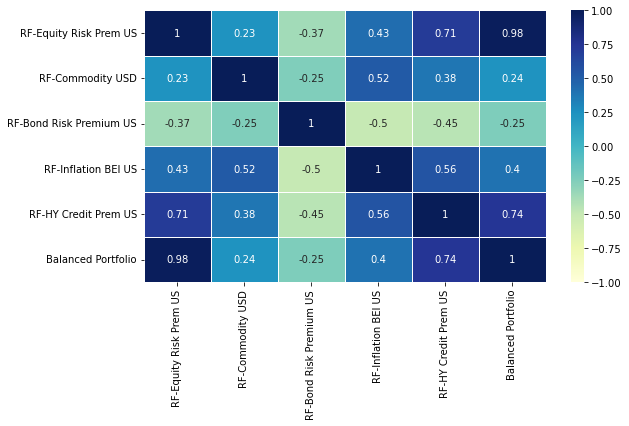

In [11]:
corr_matrix1 = correlation(data1)
heat_map(corr_matrix1)

In [12]:
data1_before = data1

X1 = sm.tools.add_constant(data1_before)

# creating a series for both

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                       1.278321
RF-Equity Risk Prem US     46.742920
RF-Commodity USD            1.405951
RF-Bond Risk Premium US     2.826487
RF-Inflation BEI US         1.956886
RF-HY Credit Prem US        3.620996
Balanced Portfolio         51.549868
dtype: float64

### General rule: If the variance inflaction factor is > 5, we drop it

For that reason, we are dropping RF-Equity Risk Prem US

In [13]:
data1_after = data1.drop(['RF-Equity Risk Prem US'], axis = 1)

X2 = sm.tools.add_constant(data1_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA AFTER
----------------------------------------------------------------------------------------------------


const                      1.122698
RF-Commodity USD           1.405816
RF-Bond Risk Premium US    1.444300
RF-Inflation BEI US        1.955135
RF-HY Credit Prem US       2.941255
Balanced Portfolio         2.253748
dtype: float64

## Building the model

In [14]:
# Define input and output variables
X = data1_after.drop('Balanced Portfolio', axis=1)
Y = data1_after['Balanced Portfolio']

# Splitting the dataset into training and testing portion
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

# Creating the instance of the model
regression_model = LinearRegression()

# Fit the model
regression_model.fit(x_train, y_train)



LinearRegression()

## Exploring the Output

In [15]:
intercept = regression_model.intercept_
coef = regression_model.coef_

print(f"The intecept for the first model is {np.round(intercept,4)}")
print('-'*100)

for cf in zip(X.columns, coef):
    print(f"The coefficient for {cf[0]} is {np.round(cf[1],4)}")

The intecept for the first model is 0.0037
----------------------------------------------------------------------------------------------------
The coefficient for RF-Commodity USD is -0.0484
The coefficient for RF-Bond Risk Premium US is 0.0933
The coefficient for RF-Inflation BEI US is 0.0214
The coefficient for RF-HY Credit Prem US is 0.6686


#### Remember:

The intercept term is the value of the dependent variable when all the independent variables are equal to zero.

Each slope coeff is the estimated change in the dependent variable for a one unit change in that particular independet variable.
For example, if we hold all independent variable constant, an one unit increase in the RF-HY Credit Premium, would lead to 0.6686% return for our balanced portfolio

#### Making predictions

In [16]:
y_predict = regression_model.predict(x_test)

# first five prediction values
y_predict[:5]

array([ 0.0061474 , -0.01291699,  0.00844941,  0.05280843,  0.00586642])

## Evaluating the model  (using statsmodel)

In [17]:
# define input
X2 = sm.add_constant(X)

# create an OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

#### Checking for Normally Distributed Residuals

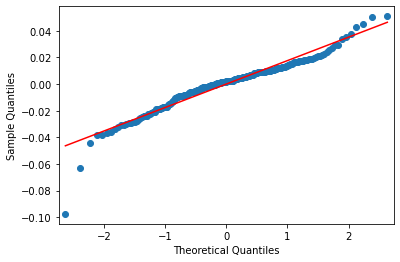

In [18]:
sm.qqplot(est.resid, line='s')
pylab.show()

#### Checking that the mean of the residuals is close to 0

In [19]:
mean_residuals = sum(est.resid) / len(est.resid)
mean_residuals

-3.426993803596376e-17

### Summary - Model 1

In [21]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     Balanced Portfolio   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     72.72
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           7.58e-40
Time:                        20:01:30   Log-Likelihood:                 621.28
No. Observations:                 237   AIC:                            -1233.
Df Residuals:                     232   BIC:                            -1215.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Plotting the results

Text(0.5, 1.0, 'Actual vs Predicted')

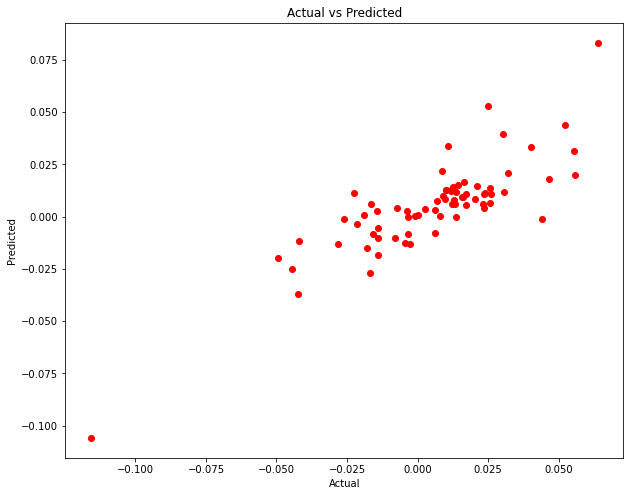

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predict, color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Model 2 - Real Estate Portfolio

## Assumptions of the Model

1. Regression residuals must be normally distributed
2. A linear relationship is assumed between the dependent variable and the independent variables.
3. Absence of multicollinearity  is expected in the model, meaning that the independent variables are not too highly correlated


In [23]:
## Second model
data2 = data.drop('Balanced Portfolio', axis=1)
data2.head()

,RF-Equity Risk Prem US,RF-Commodity USD,RF-Bond Risk Premium US,RF-Inflation BEI US,RF-HY Credit Prem US,Real Estate Portfolio
Date,,,,,,
2001-01-31,0.030072,-0.007621,-0.004521,-0.009590,0.053886,0.006028
2001-02-28,-0.108427,-0.046314,0.020991,-0.027348,0.005430,0.005412
2001-03-31,-0.075763,-0.031978,0.000303,0.011790,-0.027338,0.005959
2001-04-30,0.077355,0.006122,-0.030078,0.017241,-0.006038,0.004846
2001-05-31,-0.000131,0.009871,-0.003840,-0.018456,0.011418,0.004984


### Checking for Multicollinearity 

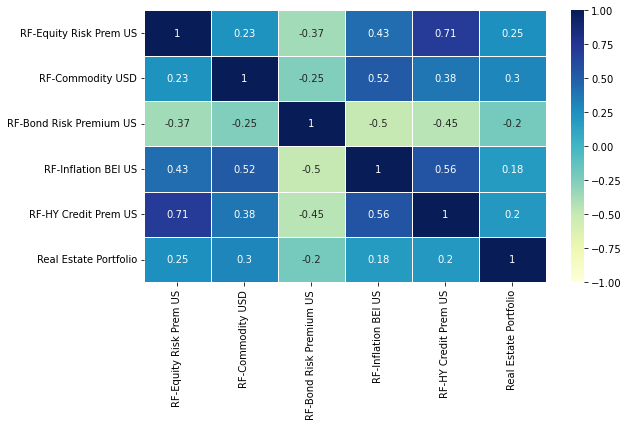

In [24]:
corr_matrix2 = correlation(data2)
heat_map(corr_matrix2)

In [25]:
data2_before = data2

X3 = sm.tools.add_constant(data2_before)

#creating a series before

series_before2 = pd.Series([variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])], index=X3.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before2)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                      1.266323
RF-Equity Risk Prem US     2.106779
RF-Commodity USD           1.507366
RF-Bond Risk Premium US    1.437607
RF-Inflation BEI US        1.963054
RF-HY Credit Prem US       2.523151
Real Estate Portfolio      1.164842
dtype: float64

### General rule: If the variance inflaction factor is > 5, we drop it

Here, nothing needs to be dropped

## Building the model

In [26]:
# Define input and output variables
X = data2.drop('Real Estate Portfolio', axis=1)
Y = data2['Real Estate Portfolio']

# Splitting the dataset into training and testing portion
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

# Creating the instance of the model
regression_model = LinearRegression()

# Fit the model
regression_model.fit(x_train, y_train)



LinearRegression()

### Exploring the Output

In [27]:
intercept = regression_model.intercept_
coef = regression_model.coef_

print(f"The intecept for the second model is {np.round(intercept,4)}")
print('-'*100)

for cf in zip(X.columns, coef):
    print(f"The coefficient for {cf[0]} is {np.round(cf[1],4)}")

The intecept for the second model is 0.0075
----------------------------------------------------------------------------------------------------
The coefficient for RF-Equity Risk Prem US is 0.0323
The coefficient for RF-Commodity USD is 0.0757
The coefficient for RF-Bond Risk Premium US is -0.1822
The coefficient for RF-Inflation BEI US is -0.1767
The coefficient for RF-HY Credit Prem US is 0.038


### Making predictions

In [28]:
y_predict = regression_model.predict(x_test)

# first five prediction values
y_predict[:5]

array([ 0.00914221,  0.00634516,  0.01327156, -0.00429643,  0.00641723])

## Evaluating the model  (using statsmodel)

In [29]:
# define input
X4 = sm.add_constant(X)

# create an OLS model
model = sm.OLS(Y, X4)

# fit the data
est = model.fit()

#### Checking for Normally Distributed Residuals

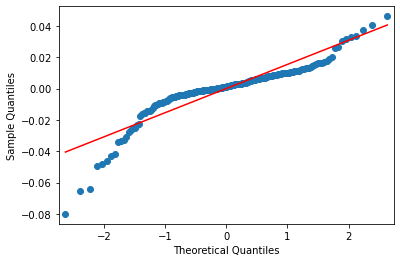

In [30]:
sm.qqplot(est.resid, line='s')
pylab.show()

#### Checking that the mean of the residuals is close to 0

In [31]:
mean_residuals = sum(est.resid) / len(est.resid)
mean_residuals

-1.1473329318960528e-16

### Summary - Model 2

In [32]:
print(est.summary())

                              OLS Regression Results                             
Dep. Variable:     Real Estate Portfolio   R-squared:                       0.142
Model:                               OLS   Adj. R-squared:                  0.123
Method:                    Least Squares   F-statistic:                     7.616
Date:                   Mon, 27 Jun 2022   Prob (F-statistic):           1.21e-06
Time:                           20:01:31   Log-Likelihood:                 653.01
No. Observations:                    237   AIC:                            -1294.
Df Residuals:                        231   BIC:                            -1273.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### Plotting the results 

Text(0.5, 1.0, 'Actual vs Predicted')

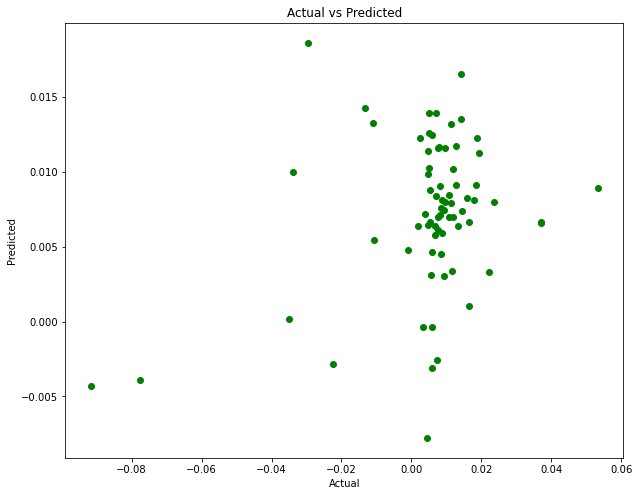

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predict, color='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Commentary

### - Comment on which risk factors appear to explain or correlate to the returns of the 2 investment portfolios

From the heat map below it can clearly be seen that Equity Risk Premium and High Yield Credit Premium are strongly correlated with the Balanced Portfolio with the corr values of 0.98 and 0.74, respectivley.


On the contrary, none of the risk factors have had major influence on the Real Estate Portfolio which is why we have seen low values of R-squared for the second model.

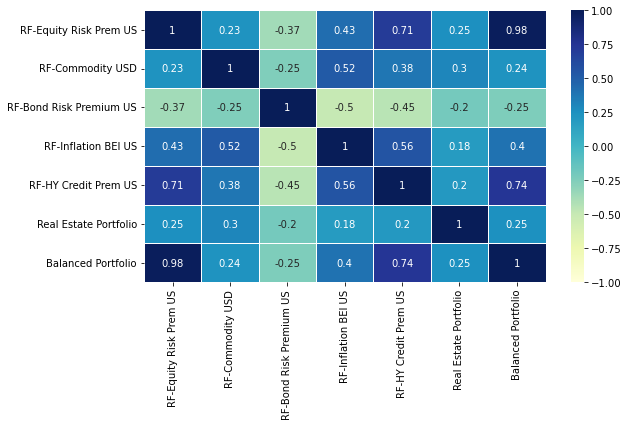

In [38]:
heat_map(overall_correlation)

### - Comment on the results of the two regression models and any potential limitations of your approach

##### First Model: Using Balanced Portfolio

At the start of building the regression model, several assumptions have been made:

1. Regression residuals must be normally distributed.
2. A linear relationship is assumed between the dependent variable and independent variables.
3. Absence of multicollinearity is expected in the model.

We have confirmed our assumptions and have indeed seen that residuals are normally distributed, there is a linear relationship and there was no multicollinearity. Nevertheless, observing the summary statistics of the model, the R-squared value is only 0.556, which is not ideal. This goes to say that the data doesn't fit our model very well.

Another aspect of the summary to look for is the confidence intervals and the p-value. This helps us with the hypothesis testing where we are trying to determine the statistical significance of the coefficient estimates. What we wanted to see are the p values lower than 0.05 and in the first model we have:

- p-value of RF-Bond Risk Premium US as 0.026
- p-value of RF-HY Credit Prem US as 0.000

which means that these two risk factors are significant and we should include them in the model. On the contrary, we have two risk factors that showed insignificant for the model performance with p-values of:

- p-value of RF-Commodity USD as 0.269
- p-value of RF-Inflation BEI US as 0.369


To provide extra confirmation, we can observe the t-values for the significant factors and what we are looking for is a higher t-value to add extra confirmation on rejecting the null-hypothesis. As t value is the coefficient divided by the standard error, hence t values for the High Yield Credit Premium and Bond Risk Premium are 14.276 and 2.246, respectively.

*Note:

Null hypothesis: No relationship between the exploratory and explanatory variables.

Rejecting the null hypothesis, we are saying that there is a relationship, and the coefficients are not 0.



##### Second Model: Using Real Estate Portfolio

Compared to the first model, the second model has much lower performance.

Starting with the R-squared value of 0.142 which indicates that the data doesn't fit our model well.

Observing the p-values we can see that the only two factors that have significance in this model, are two factors which were rejected by the first model.

- p-value of RF-Equity Risk Prem US as 0.008
- p-value of RF-Commodity USD as 0.000

Additionally, the t-values for the significant factors are 4.083 and 2.673 respectively.

With this summary statistics, we can conclude that this is not the model we would choose to explain the returns of the Real Estate Portfolio.


## Potential Limitations

The primary limitation of this model and linear regression in general is the assumption of linearity between the dependent variable and independent variables. To prove this we can see part of the scatter matrix below that highlights two rows:

- Real Estate Portfolio
- Balanced Portfolio

From the top row (Real Estate Portfolio) we can see that there is barely any linear relationship between the data and this is the main assumption when the model was created so it is not surprising  that the results of model 2 were insignificant.

In the very bottom row represented by the Balanced Portfolio it is clear that some factors exhibit linear relationship such as the RF-Equity Risk Premium and RF-HY Credit Premium but other factors not that much. This is the reason the first model had a better performance than the second one, but still we didn't see a high R-squared value.

#### Other limitations:

Other potential limitations of this model include:

- Noise and overfitting
- Very sensitive to outliers (anomalies)
- Prone to multicollinearity.

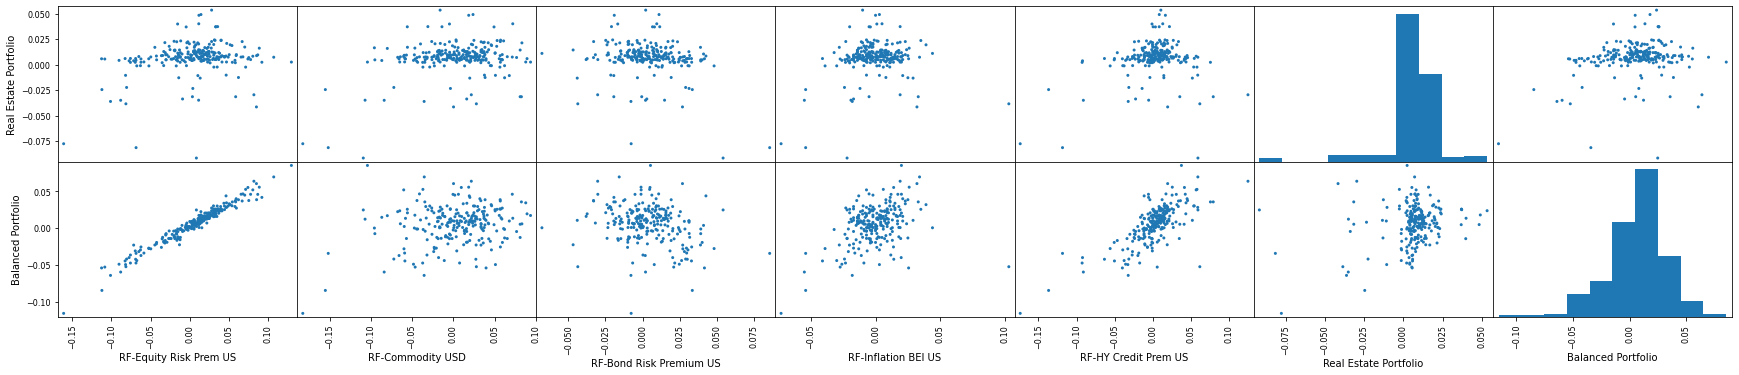

In [71]:
axes = pd.plotting.scatter_matrix(data, alpha=1, figsize=(30,20))

for i in range(0,5):
    for j in range(0,7):
        axes[i,j].set_visible(False)
plt.show()

### - Suggest other ways the time series data could be analysed to identify patterns and links between the factors and portfolios

Knowing that the OLS regression has weaknesses which were stated earlier, there are some more advanced regression models that could be used to identify patterns and links between the factors and portfolios.

- Ridge regression was designed to allow modelling even when multicollinearity is present and it also helps with overfitting.

- Partial least squares (PLS) regression allows for modelling when independent variables are highly correlated.

Lastly, a good approach would be to try and fit a non-linear regression model as we have seen that Real Estate Portfolio and the 5 factors don't exhibit a linear relationship.

